In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import xgboost as xgb
import joblib

from sklearn import tree
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

/Users/naman/.pyenv/versions/3.6.8/lib/python3.6/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
df = pd.read_csv("data/one_hot_data.csv")

In [3]:
df.head()

,Unnamed: 0,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,0,802906,6,487,12198,2,30,6,5,1,...,0,0,0,0,0,0,0,0,1,0
1,1,28830,8,900,2812,2,10,8,7,0,...,0,0,0,0,0,0,0,0,1,0
2,2,94947,21,363,8973,2,10,5,5,0,...,0,0,0,0,0,0,0,0,1,0
3,3,590882,22,418,10694,2,10,6,5,0,...,0,0,0,0,0,0,0,0,1,0
4,4,201944,11,131,1488,3,30,8,9,1,...,0,0,0,0,0,0,0,0,1,0


In [4]:
df2 = pd.read_csv("data/train_labels.csv")

In [5]:
df2.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [6]:
test = df['building_id']
test2 = df2['building_id']
for i in range(len(test)):
    if test[i] != test2[i]:
        print(i)

In [7]:
df = df.drop(['Unnamed: 0', 'building_id'], axis=1)

In [8]:
df.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
columns = df.columns

In [10]:
X = df.to_numpy()

In [20]:
Y = df2['damage_grade'].to_numpy()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [33]:
litef_ensemble = lgb.LGBMClassifier(n_estimators=3000, n_jobs=6, num_leaves=80, objective='multiclass', 
                                    boosting_type='gbdt')
gbf = xgb.XGBClassifier(n_estimators=4000, objective='multi:softmax', num_class=3, n_jobs=-1)

In [34]:
litef_ensemble.fit(X, Y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=3000, n_jobs=6, num_leaves=80,
               objective='multiclass', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

AttributeError: 'LGBMClassifier' object has no attribute 'tree_'

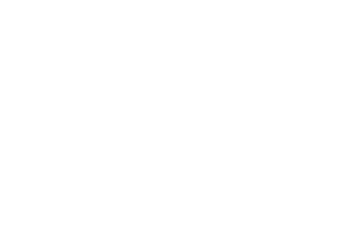

In [80]:
tree.plot_tree(litef_ensemble)

In [ ]:
gbf.fit(X, Y)

In [38]:
predictions_train = 0.5 * gbf.predict_proba(X_train) + 0.5 * litef_ensemble.predict_proba(X_train)
prediction_train = np.argmax(predictions_train, axis=1) + 1
predictions_test = 0.5 * gbf.predict_proba(X_test) + 0.5 * litef_ensemble.predict_proba(X_test)
prediction_test = np.argmax(predictions_test, axis=1) + 1

In [39]:
print(f1_score(y_train, prediction_train, average='micro'))
print(f1_score(y_test, prediction_test, average='micro'))

0.7997601688411359
0.74743385583546


In [20]:
eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('litegbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=3000, n_jobs=6,
                                             num_leaves=32,
                                             objective='multiclass',
                                             random_state=None, reg_alpha=0.0,
                                             reg_lambda=0.0, silent...
                                            colsample_bylev

In [23]:
print(f1_score(y_train, eclf.predict(X_train), average='micro'))
print(f1_score(y_test, eclf.predict(X_test), average='micro'))

0.7997601688411359
0.74743385583546


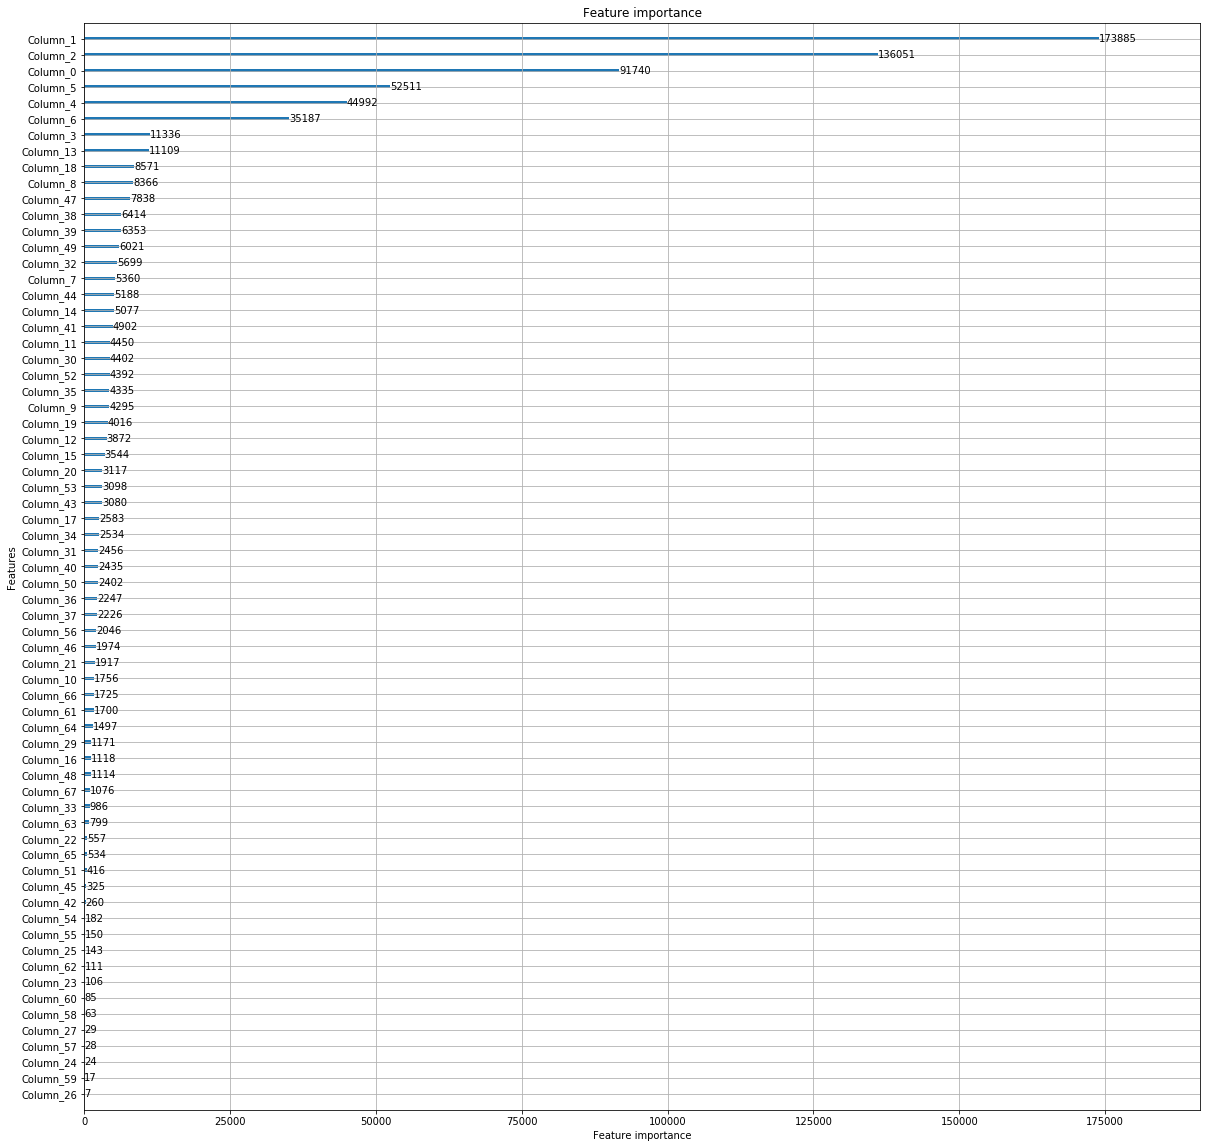

In [73]:
# importances = litef_ensemble.feature_importances_
# std = np.std([tree.feature_importances_ for tree in litef_ensemble.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# # Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(X.shape[1]), importances[indices],
#        color="r", yerr=std[indices], align="center")
# plt.xticks(range(X.shape[1]), indices)
# plt.xlim([-1, X.shape[1]])
# plt.show()
lgb.plot_importance(litef_ensemble, figsize=(20, 20))
plt.savefig('importances')

In [25]:
test = pd.read_csv('data/test_values.csv', index_col='building_id')
test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,t,r,n,...,0,0,0,0,0,0,0,0,0,0
99355,6,141,11987,2,25,13,5,t,r,n,...,1,0,0,0,0,0,0,0,0,0
890251,22,19,10044,2,5,4,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
745817,26,39,633,1,0,19,3,t,r,x,...,0,0,1,0,0,0,0,0,0,0
421793,17,289,7970,3,15,8,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0


In [26]:
def oneHot(df, column_name):
    one_hot = pd.get_dummies(df[column_name])
    df = df.drop(column_name,axis = 1)
    df = df.join(one_hot)
    for letter in one_hot.columns:
        df[column_name + "_" + letter] = df[letter]
        df.drop(letter, axis=1, inplace=True)
    return df

categorical_vars = ["foundation_type", "land_surface_condition", "roof_type", "ground_floor_type", "other_floor_type", "position", "plan_configuration", "legal_ownership_status"]
for var in categorical_vars:
    test = oneHot(test, var)
    

In [35]:
print(len(test.columns), len(columns))

for i in range (len(test.columns)):

    if test.columns[i] != columns[i]:
        print(test.columns[i], columns[i])

68 68


In [28]:
test = test.reindex(columns=columns)

In [36]:
test1 = test.to_numpy()

In [40]:
test_pred = litef_ensemble.predict(test1)
# predictions_test = 0.5 * gbf.predict_proba(test1) + 0.5 * litef_ensemble.predict_proba(test1)
# prediction_test = np.argmax(predictions_test, axis=1) + 1

In [ ]:
# test_prediction = litef_ensemble.predict(test1)

In [41]:
submission_format = pd.read_csv('data/submission_format.csv', index_col='building_id')

In [42]:
my_submission = pd.DataFrame(data=test_pred,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [43]:
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,3


In [44]:
my_submission.to_csv('data/submission5.csv')

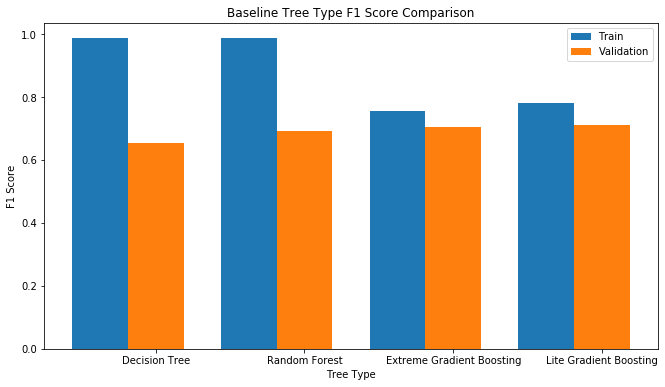

In [19]:
xs = np.arange(4)
# F1_baselines = [0.6549, 0.7137, 0.7365, 0.7226]
F1_baselines_train = [0.9867, 0.9867, 0.7542, 0.7823]
F1_baselines_test = [0.6549, 0.6911, 0.7046, 0.7119]
F1_baseline_labels = ['Decision Tree', 'Random Forest', 'Extreme Gradient Boosting', 'Lite Gradient Boosting']
plt.figure(figsize=(11,6))
plt.bar(xs-0.375, F1_baselines_train, align='center', color='tab:blue', label='Train', width=0.375)
plt.bar(xs, F1_baselines_test, align='center', color='tab:orange', label='Validation', width=0.375)
plt.legend()
plt.xticks(xs, F1_baseline_labels)
plt.xlabel('Tree Type')
plt.ylabel('F1 Score')
plt.title('Baseline Tree Type F1 Score Comparison')
plt.savefig('source_images/baseline_tree_comp.png')